In [54]:
import numpy as np
import pandas as pd
%precision 3
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [16]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [20]:
scores_df =pd.DataFrame({'score':scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [21]:
sum(scores)/len(scores)

55.0

In [22]:
np.mean(scores)

55.0

In [23]:
scores_df.mean()

score    55.0
dtype: float64

In [24]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [26]:
n = len(sorted_scores)
if n%2 ==0:
    m0 = sorted_scores[n//2 -1]
    m1 = sorted_scores[n//2 ]
    median = (m0 +m1)/2
else :
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

In [27]:
np.median(scores)

56.5

In [28]:
scores_df.median()

score    56.5
dtype: float64

In [31]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [32]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [33]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [34]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [35]:
np.mean(deviation)

0.0

In [36]:
np.mean(another_deviation)

0.0

In [37]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [38]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [39]:
np.mean(deviation**2)

86.0

In [40]:
np.var(scores)

86.0

In [51]:
scores_df.var()

score    95.555556
dtype: float64

In [42]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [52]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [44]:
np.max(scores) - np.min(scores)

28

In [45]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [46]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [47]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [55]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

In [56]:
z = 50 + 10*(scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [57]:
scores_df['deviation value'] =z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [59]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [60]:
freq,_ = np.histogram(english_scores, bins = 10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [61]:
#0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)] 
#freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name ='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [62]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [63]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [64]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [66]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value','frequency','relative frequency','cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [67]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

In [68]:
#Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt
# 그래프가 jupyter notebook 위에 표시
%matplotlib inline

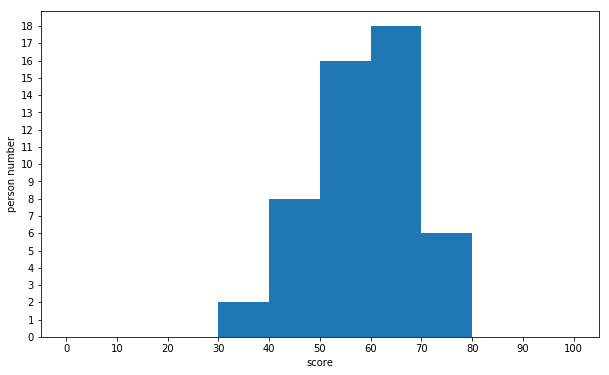

In [69]:
#figsize로 가로, 세로 크기를 지정
fig = plt.figure(figsize=(10,6))
#캔버스 위에 그래프를 그리기 위한 영역을 지점, 인수는 영역을 1*1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

#계급수를 10으로 하여 히스토그램을 그림
freq, _, _=ax.hist(english_scores, bins =10, range = (0,100))
#x축에 레이블 부여
ax.set_xlabel('score')
#y축에 레이블 부여
ax.set_ylabel('person number')
#x축을 0,10,20,...,100 눈금으로 구분
ax.set_xticks(np.linspace(0,100,10+1))
#y축을 0,1,2,... 눈금으로 구분
ax.set_yticks(np.arange(0,freq.max()+1))
# 그래프 표시
plt.show()


In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
#y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

#상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있다.
#이것은 hist의 인수 weight를 지정하면 실현가능하다.
weights = np.ones_like(english_scores)/len(english_scores)
rel_freq, _,_=ax1.hist(english_scores,bins=25, range=(0,100),weights=weights)

cum_rel_freq = np.cumcum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]
#꺾은선 그래프를 그림
#인수 ls를 '--'로 하면 점선이 그려집, 인수 marker를 'o'로 하면 데이터 점을 그림, 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,ls='--',marker='o',color = 'gray')
#꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative fre')
ax1.set_ylabel
ax1.set_xticks


